In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

https://stackoverflow.com/questions/78694374/fitting-ode-to-elements-in-graph

In [2]:
def dose(t, y, b, s, c, p, d):
    target, infectious, virus = y
    return np.array([
        -b * target * virus,
        b * target * virus - s * infectious,
        (1. / (d + 1.)) * p * infectious - c * virus
    ])

In [3]:
def model(D, b, s, c, p):
    solutions = []
    for d in D:
        solution = integrate.solve_ivp(
            dose, [0, 5], y0=[1, 0, 0.01],
            t_eval=[2.8828828828828827], # np.linspace(0, 60, 1000)[48]
            args=(b, s, c, p, d)
        )
        data = solution.y[2, 0] / 0.01950269536785707
        solutions.append(data)
    return np.array(solutions)

In [4]:
b = 0.00001
s = 4
c = 4
p = 2000000

D = np.logspace(-3, 3, 20)

z = model(D, b, s, c, p)
s = np.ones_like(z) * 0.01
n = s * np.random.normal(size=s.size)
zn = z + n

In [16]:
popt, pcov = optimize.curve_fit(
    model, D, z, p0=[1e-5, 1, 1, 1e6],
    method="trf", bounds=(0, np.inf),
    sigma=s, absolute_sigma=True
)

In [17]:
popt, pcov

(array([1.98458746e-05, 3.39384930e+00, 4.55114043e+00, 1.00007349e+06]),
 array([[ 3.34087814e-11, -1.30089251e-04,  1.49383122e-04,
         -2.09816036e-12],
        [-1.30089251e-04,  5.14721701e+02, -5.90570254e+02,
          8.29567173e-06],
        [ 1.49383122e-04, -5.90570254e+02,  6.77624786e+02,
         -9.51846816e-06],
        [-2.09816036e-12,  8.29567173e-06, -9.51846816e-06,
          1.33704216e-13]]))

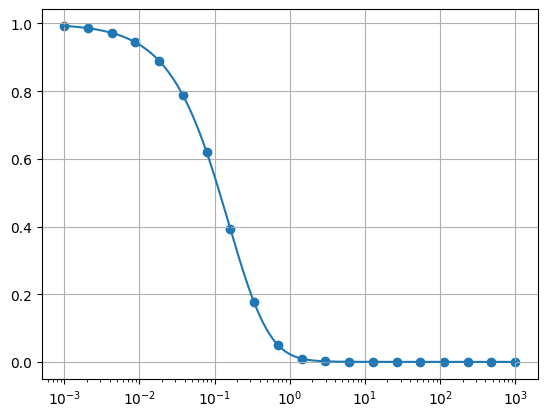

In [19]:
Dlog = np.logspace(-3, 3, 200)
fig, axe = plt.subplots()
axe.scatter(D, z)
axe.semilogx(Dlog, model(Dlog, *popt))
axe.grid()